

<h1 align=center><font size = 5>Application of Machine Learning in Predicting Customer Churn</font></h1>
<h1 align=center><font size = 5>Predictive & Optimization Analytics </font></h1>
<h1 align=center><font size = 4>By</font></h1>
<h1 align=center><font size = 4>Norman Angel Agong</font></h1>
<h1 align=center><font size = 4>Email: anormanangel@gmail.com</font></h1>
</font></h1>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#problem">Problem Defination</a></li>
        <li><a href="https://#research_objectives">Research Objectives</a></li>
        <li><a href="https://#about_dataset">Data Collection</a></li>
        <li><a href="https://#data_cleaning">Data cleaning and Preprocessing</a></li>
        <li><a href="https://#eda">Exploratory Data Analysis</a></li>
        <li><a href="https://#modeling">Feature Engineering</a></li>
        <li><a href="https://#modeling">Model Creation</a></li>
        <li><a href="https://#evaluation">Model Evaluation</a></li>
        <li><a href="https://#optimization">Model Optimization</a></li>
        <li><a href="https://#deployment">Model Deployment</a></li>
    </ol>
</div>
<br>
<hr>

# Problem Defination: Customer Churn

In the Tours and Travel industry, user behaviour significantly influences the transportation
landscape. Emerging prominent players are reshaping how people travel with commitment to
safe and reliable transportation services, Tours & Travel companies have become a preferred
choice for daily commuting around the world. However, the companies are facing a critical
challenge of customer churn, where users discontinue their engagement with the platform.


Addressing this challenge is vital for sustaining growth and ensuring customer satisfaction.
Employing a data-driven approach by implementing effective predictive model to analyse user
behaviour patterns and implement proactive strategies to mitigate ride churn is essential for
growth and sustainability. Identifying the factors influencing customer churn and predicting
users at risk of churning are crucial steps in ensuring sustainability and maintaining its
competitive edge in the Tours and Travel market.

# Objectives

The main objective of this project is to develop a model that can accurately Predict customer
churn based on customer data and relevant indicators. With this we aim to:
1. Identify the key indicators of customer churn.
2. Build Predictive Models to Predict customer churn for tour and travels company based on
customer data.
3. Utilize insights gained from the predictive model to tailor retention efforts and allocate
resources more effectively including target marketing campaigns, personalized offers,
enhanced customer service, or product improvements.

<h2 id="about_dataset">Description of the Data</h2>

We will use a Tour & Travels Company dataset for predicting customer churn. This dataset is obtained from Kaggle for a Tours and Travel company in the United States. This is a historical customer dataset where each row represents one customer offers straightforward insights. As it is more cost-effective to retain existing customers than acquire new ones, our primary goal in this analysis is to predict which customers will remain loyal to our services.

This data set will provide key indicators of customer churn allowing us to anticipate the behaviors that contribute to customer retention and predict what behavior will help us to retain customers.

The dataset includes information about:

*   Age of users
*   FrequesntFlyer: Wheather customer takes frequent flights
*   AnnualIncomeClass: Class of annual income of user
*   ServicesOpted: Number of times services opted during recent years
*   AccountSyncedToSocialMedia: Wheather Company Account of User is Synchronized to their Social Media
*   BookedHotelOrNot: Wheather the customer booked lodging/Hotels using company services
*   Target: 1 = Customers Churns, 0 = Customer Dosent Churn

Link to dataseton Kaggle: https://bit.ly/3rzy2Sw


<h2 id="research_questions">Research Questions</h2>

*   What are the factors that contribute to churn?
*   What are the key indicators of customer churn?

<h2 id="assumption_and_scope">Assumption</h2>

* No unusual occurrences will have a substantial impact on the data we used (Outliers)

* There are no unanticipated negative impacts to the company employing any advised technique

In [24]:
#Importing Libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# data pre-processing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
import ssl
import urllib.request

# Disable SSL certificate verification
ssl_context = ssl.create_default_context()
ssl_context.check_hostname = False
ssl_context.verify_mode = ssl.CERT_NONE

# Make HTTPS request with disabled SSL verification
with urllib.request.urlopen("https://example.com", context=ssl_context) as response:
    html = response.read()
    print(html)

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 2em;\n        background-color: #fdfdff;\n        border-radius: 0.5em;\n        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        div {\n            margin: 0 auto;\n            width: auto;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n    

### Load Data From CSV File


In [26]:
df = pd.read_csv("https://raw.githubusercontent.com/anormanangel/Datasets/main/Customertravel.csv")
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


# Data Cleaning & Preprocessing 

 - Data Formating
 - Detect and Treat Missing Nos
 - Outlier Detection and Handling
 - Dealing with Duplicates
 - Handling Inconsistent Data
 - Dealing with Data Redundancy
 - Handling Inconsistent Naming Conventions

In [27]:
# rename churn column for clarity

df.rename(columns={'Target': 'Churn'}, inplace=True)

In [28]:
# Check the format

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Churn                       954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [29]:
# Check for null values in the DataFrame

df.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Churn                         0
dtype: int64

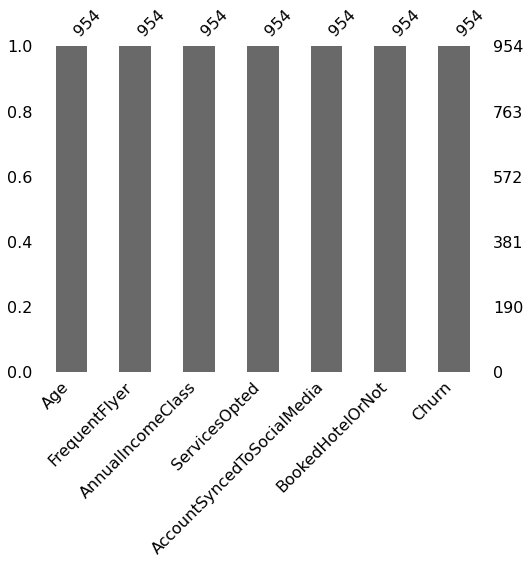

In [7]:
# check for missing Nos

import missingno as mn

# Assuming df is your DataFrame
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the values (width, height) as needed
mn.bar(df, ax=ax)

# Show the plot
plt.show()

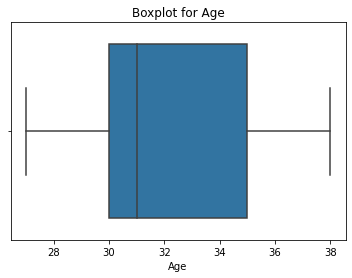

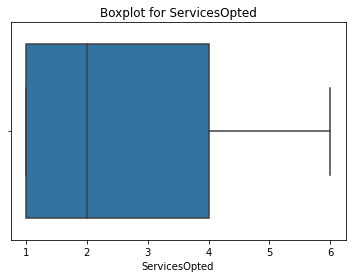

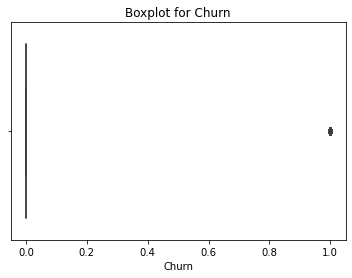

In [30]:
# Check for Outliers

numerical_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()

# Loop through numerical columns
for col in numerical_columns:
    # Exclude 'year' from box plots
    if col != 'year':
        # Create a box plot
        sns.boxplot(x=df[col])
        
        # Set title and labels
        plt.title(f'Boxplot for {col}')
        plt.xlabel(col)
        
        # Display the plot
        plt.show()

# Exploratory Data Analysis

In [31]:
df.shape

(954, 7)

In [32]:
#Summary of statistics separately for each group defined by the 'Churn' column

df.groupby('Churn').describe()

Age                                                    ServicesOpted  \
       count       mean       std   min   25%   50%   75%   max         count   
Churn                                                                           
0      730.0  32.352055  3.209323  27.0  30.0  31.0  35.0  38.0         730.0   
1      224.0  31.316964  3.620133  27.0  28.0  30.0  35.0  38.0         224.0   

                                                    
           mean       std  min  25%  50%  75%  max  
Churn                                               
0      2.402740  1.554495  1.0  1.0  2.0  3.0  6.0  
1      2.549107  1.763430  1.0  1.0  2.0  4.0  6.0

In [33]:
#Assess the distribution and characteristics of numerical data in the dataset

print("Statistical Summary")
df.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Churn,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [34]:
#Understanding the distribution of categorical data in your dataset

df.describe(include = 'object')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


In [35]:
# Calculate the correlation coefficients between all pairs of numerical columns in the DataFrame.

correlation_matrix = df[['Age', 'ServicesOpted', 'Churn']].corr()
print(correlation_matrix)

                    Age  ServicesOpted     Churn
Age            1.000000      -0.012422 -0.131534
ServicesOpted -0.012422       1.000000  0.038646
Churn         -0.131534       0.038646  1.000000


1. Age vs. Age (-0.012422):
There is little to no linear relationship between the age of customers and their own age, which is expected.
The correlation coefficient is very close to zero, indicating weak correlation.

2. Age vs. ServicesOpted (-0.131534):
There is a slight negative correlation between the age of customers and the number of services opted for.
As the age of customers increases, the number of services opted for tends to slightly decrease, and vice versa.
The correlation is relatively weak.

3. Age vs. Churn (-0.131534):
There is a slight negative correlation between the age of customers and their likelihood of churn.
As the age of customers increases, their likelihood of churn slightly decreases, and vice versa.
The correlation is relatively weak.

4. ServicesOpted vs. ServicesOpted (0.038646):
There is little to no linear relationship between the number of services opted for and itself.
The correlation coefficient is close to zero, indicating weak correlation.

5. ServicesOpted vs. Churn (0.038646):
There is a slight positive correlation between the number of services opted for and the likelihood of churn.
Customers who opt for more services tend to have a slightly higher likelihood of churn.
The correlation is relatively weak.

6. Churn vs. Churn (1.000000):
This coefficient is always 1 since it measures the correlation of 'Churn' with itself.
It simply reflects the proportion of churned customers in the dataset.

## Univeriate Analysis

We'll explore each variable individually to understand its distribution and characteristics.

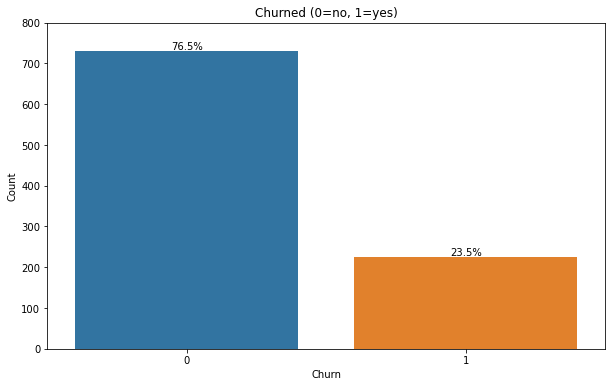

In [36]:
# Check distribution of Churn Column

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for the distribution of Churn column
ax = sns.countplot(data=df, x='Churn')
percentage = df['Churn'].value_counts(normalize=True).values * 100
lbls = [f'{p:.1f}%' for p in percentage]

# Add percentage labels to the bars
ax.bar_label(container=ax.containers[0], labels=lbls)

# Adjust y-axis limit for better visualization
plt.ylim(top=800)

# Add title and labels
plt.title('Churned (0=no, 1=yes)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Display the plot
plt.show()

The data is unbalanced, as around 76.5% are customers in the "no-churn" class (modest class imbalance 3:1), which needs to be taken into account when training and evaluating the models.

## Bivariate

For bivariate analysis, we'll explore the relationships between pairs of variables.

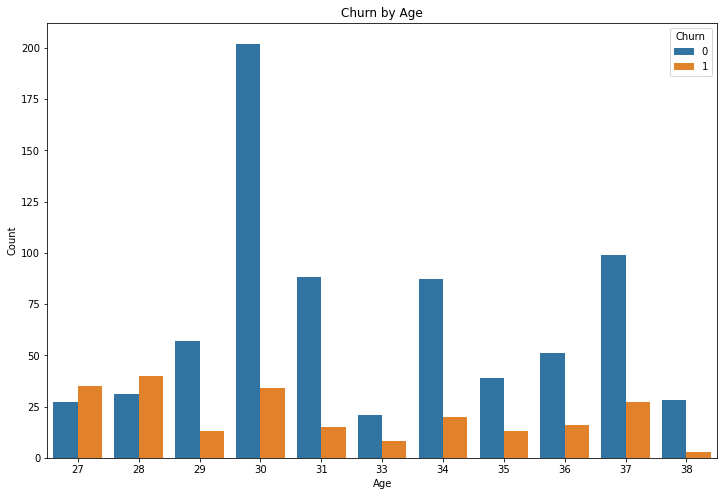

In [37]:
# Churn vs Age

# Set the size of the figure
plt.figure(figsize=(12, 8))

# Plot the countplot for Churn vs Age
sns.countplot(data=df, x='Age', hue='Churn')
plt.title('Churn by Age')
plt.xlabel('Age')
plt.ylabel('Count')

# Display the plot
plt.show()

It looks like younger customers (27-28y) tend to churn proportionally more often.

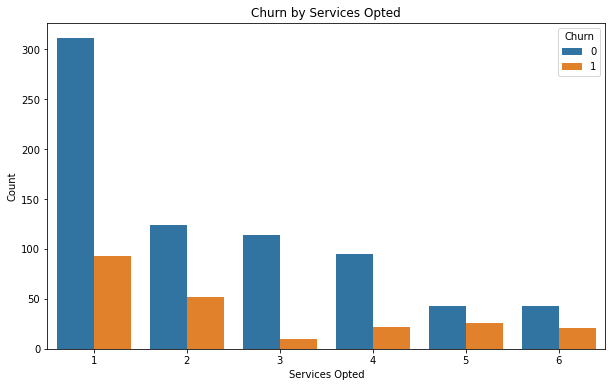

In [38]:
# Churn vs Services Opted

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for Churn by Services Opted
sns.countplot(data=df, x='ServicesOpted', hue='Churn')
plt.title('Churn by Services Opted')
plt.xlabel('Services Opted')
plt.ylabel('Count')

# Display the plot
plt.show()

Customers who opted for more services (5+) churned more than those opted for a few services

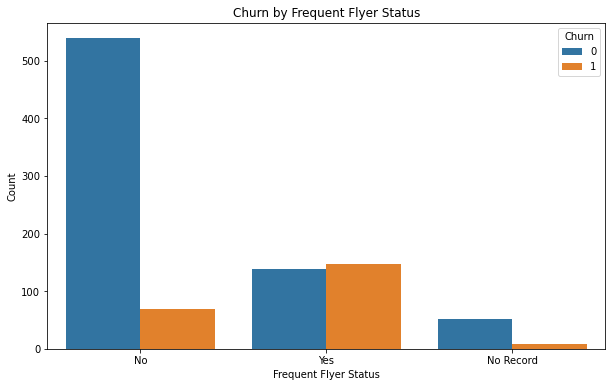

In [39]:
#Churn vs Frequent Flyer

# Increase the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for Churn by Frequent Flyer Status
sns.countplot(data=df, x='FrequentFlyer', hue='Churn')
plt.title('Churn by Frequent Flyer Status')
plt.xlabel('Frequent Flyer Status')
plt.ylabel('Count')

# Display the plot
plt.show()

It looks like frequent flyers churn more than non-frequent flyers.

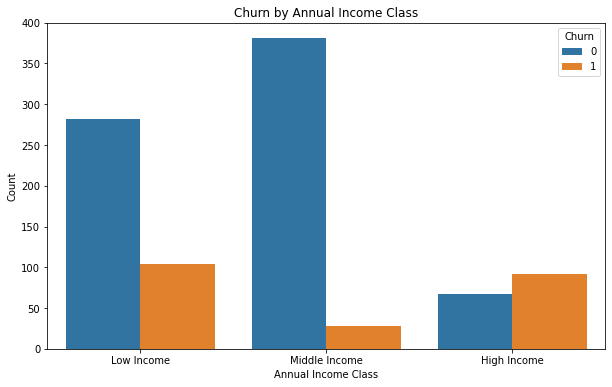

In [40]:
#Churn vs Annual Income class

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for Churn vs Annual Income Class
sns.countplot(data=df, x='AnnualIncomeClass', order=['Low Income', 'Middle Income', 'High Income'], hue='Churn')
plt.title('Churn by Annual Income Class')
plt.xlabel('Annual Income Class')
plt.ylabel('Count')

# Display the plot
plt.show()

It appears that high income individuals churn more than low and middle income classes.

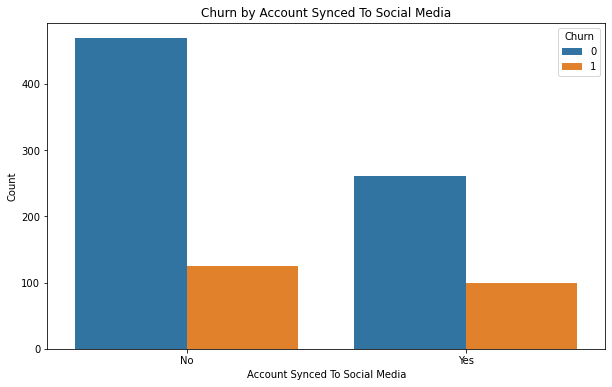

In [41]:
#Churn bs Account Synced to Social Media

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for Churn vs Account Synced To Social media
sns.countplot(data=df, x='AccountSyncedToSocialMedia', hue='Churn')
plt.title('Churn by Account Synced To Social Media')
plt.xlabel('Account Synced To Social Media')
plt.ylabel('Count')

# Display the plot
plt.show()

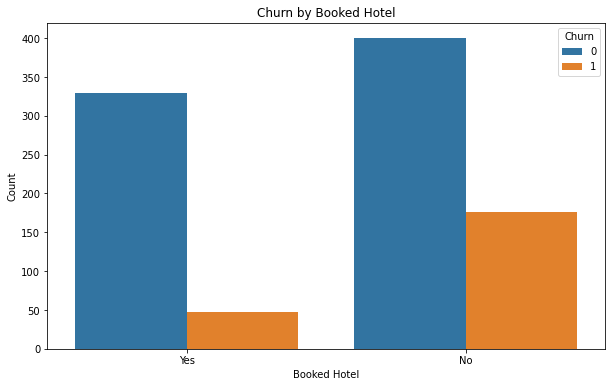

In [42]:
#Churn bs Hotel Booked

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the countplot for Churn vs Hotel Booked
sns.countplot(data=df, x='BookedHotelOrNot', hue='Churn')
plt.title('Churn by Booked Hotel')
plt.xlabel('Booked Hotel')
plt.ylabel('Count')

# Display the plot
plt.show()

## Multivariate

For multivariate analysis, we'll examine relationships between three or more variables

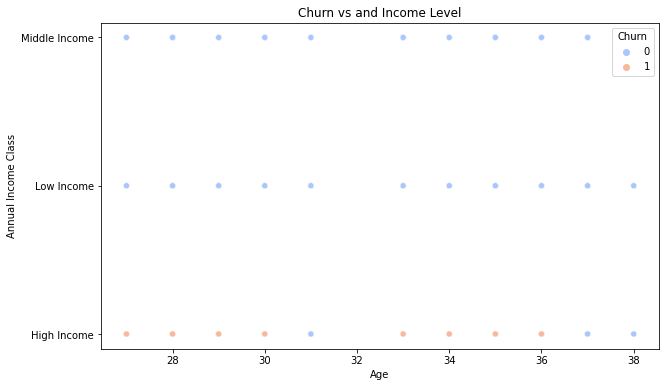

In [43]:
#Chur vs Age Vs Income Class

# Scatter plot for Churn, Age, and Income level
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='AnnualIncomeClass', hue='Churn', palette='coolwarm')
plt.title('Churn vs and Income Level')
plt.xlabel('Age')
plt.ylabel('Annual Income Class')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Feature Enconding

In [44]:
# create copy for encoding

df_coded = df.copy()

In [45]:
# Label Encoding ordinal features for services

ordinals = ['ServicesOpted']
df_coded[ordinals] = df_coded[ordinals].apply(LabelEncoder().fit_transform)

In [46]:
#Manually adapt scaling for Annual Income Class as we need to implement the ordinal scale in order to get correct scaling

df_coded = df_coded.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})

/var/folders/vq/zctkzbys72vgrrtgd956531m0000gn/T/ipykernel_2200/2081591897.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_coded = df_coded.replace({'AnnualIncomeClass': {'Low Income': 0, 'Middle Income': 1, 'High Income': 2}})


In [47]:
# One-Hot Encoding non-ordinal features

dummies = ['BookedHotelOrNot', 'AccountSyncedToSocialMedia', 'FrequentFlyer']
df_coded = pd.get_dummies(df_coded, columns = dummies, drop_first=True)

In [48]:
#rename some cols for clarity

df_coded.rename(columns={'BookedHotelOrNot_Yes':'BookedHotel', 'AccountSyncedToSocialMedia_Yes':'AccountSyncedToSocialMedia', 'FrequentFlyer_No Record': 'FrequentFlyer_No'}, inplace=True)

#Check if our data us ready for ML
df_coded.head()

,Age,AnnualIncomeClass,ServicesOpted,Churn,BookedHotel,AccountSyncedToSocialMedia,FrequentFlyer_No,FrequentFlyer_Yes
0,34,1,5,0,True,False,False,False
1,34,0,4,1,False,True,False,True
2,37,1,2,0,False,True,False,False
3,30,1,1,0,False,False,False,False
4,30,0,0,0,False,False,False,False


## Correlation Matrix to Explore Relationships Between The Variables.

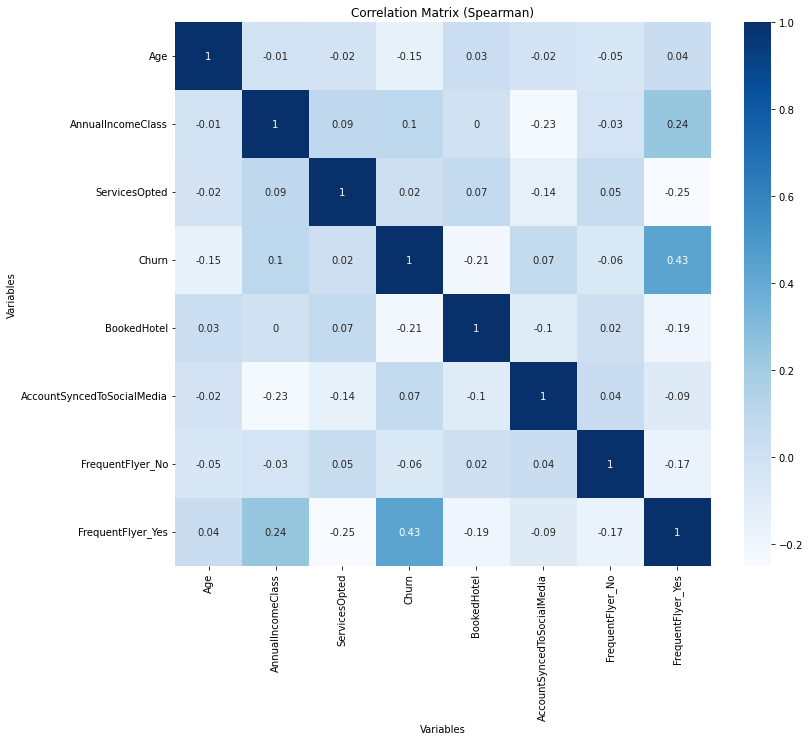

In [49]:
# Set the size of the figure
plt.figure(figsize=(12, 10))

# Plot the correlation matrix heatmap
sns.heatmap(np.round(df_coded.corr(method='spearman'), 2), annot=True, cmap='Blues')

# Add labels and title
plt.title('Correlation Matrix (Spearman)')
plt.xlabel('Variables')
plt.ylabel('Variables')

# Display the plot
plt.show()

Even though the correlation matrix needs to be interpreted with caution (as it's based on scaled variables, which is also why Spearman's correlation is used), it gives some indication that e.g. annual income class and frequent flyer status are correlated. This also indicates that frequent flyers are associated with churning.



# Modeling

In [50]:
# Split the data into training and test set

X = df_coded.drop(columns='Churn', axis=1)
y = df_coded['Churn']

# Train the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [51]:
# Generic function to fit data and display results/predictions

def fit_evaluate(clf, X_train, X_test, y_train, y_test):
    # fit model to training data
    clf.fit(X_train, y_train)
    # make predictions for test data
    y_pred = clf.predict(X_test)
    # print evaluation
    print(classification_report(y_test, y_pred))
    print('\nConfusion Matrix: \n')
    s = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap='YlGnBu');
    s.set(xlabel='Predicted class', ylabel='True class')

# Model Evaluation

Here we test some classic algorithms but also explore some classifiers that specifically account for unbalanced data (using imlearn).

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       240
           1       0.65      0.37      0.47        75

    accuracy                           0.80       315
   macro avg       0.74      0.66      0.68       315
weighted avg       0.79      0.80      0.78       315


Confusion Matrix: 



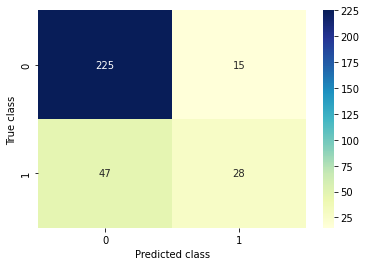

In [52]:
# Create a logistic regression model without specifying class weights
modelLR = LogisticRegression()

# Print information about logistic regression
print('* Logistic regression * \n')

# Fit, evaluate, and print results of logistic regression model
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

* Logistic regression * 

              precision    recall  f1-score   support

           0       0.91      0.76      0.83       240
           1       0.50      0.76      0.60        75

    accuracy                           0.76       315
   macro avg       0.70      0.76      0.71       315
weighted avg       0.81      0.76      0.77       315


Confusion Matrix: 



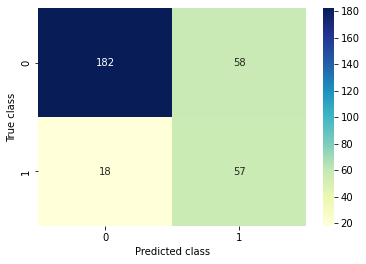

In [53]:
# Create a logistic regression model with balanced class weights
modelLR = LogisticRegression(class_weight='balanced')

# Print information about logistic regression
print('* Logistic regression * \n')

# Fit, evaluate, and print results of logistic regression model
fit_evaluate(modelLR, X_train, X_test, y_train, y_test)

Balancing the classes does not substantially improve the model. The prediction of the minority class gets better (at a cost of the majority class), as the model gets penalized more for errors in the minority class.

* Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       240
           1       0.76      0.69      0.73        75

    accuracy                           0.88       315
   macro avg       0.84      0.81      0.82       315
weighted avg       0.87      0.88      0.87       315


Confusion Matrix: 



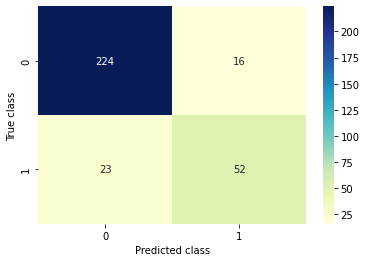

In [54]:
# Create a Random Forest Classifier model
modelRF = RandomForestClassifier()

# Print information about the Random Forest Classifier
print('* Random Forest Classifier * \n')

# Fit, evaluate, and print results of the Random Forest Classifier model
fit_evaluate(modelRF, X_train, X_test, y_train, y_test)

The random forest classifier performs overall better than logistic regression. Next, testing if balancing the data improves the performance, particularly for the underrepresented class 1 (churned) using a balanced random forest classifier that randomly under-samples each boostrap sample to balance it.

* Balanced Random Forest Classifier * 

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       240
           1       0.66      0.92      0.77        75

    accuracy                           0.87       315
   macro avg       0.82      0.89      0.84       315
weighted avg       0.90      0.87      0.88       315


Confusion Matrix: 



/Users/normanangel/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/normanangel/opt/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


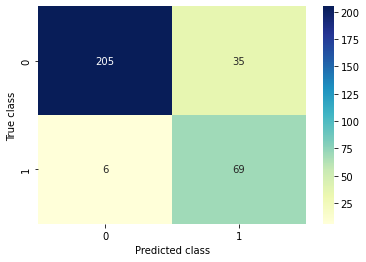

In [55]:
# Create a Balanced Random Forest Classifier model
modelRF_bal = BalancedRandomForestClassifier()

# Print information about the Balanced Random Forest Classifier
print('* Balanced Random Forest Classifier * \n')

# Fit, evaluate, and print results of the Balanced Random Forest Classifier model
fit_evaluate(modelRF_bal, X_train, X_test, y_train, y_test)

The balanced random forest classifier classifies the minority class often correctly, however, at the cost of many false negatives. This shows that downsampling favors class 1, compared to other models.

* Gradient Boosting Classifier * 

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       240
           1       0.79      0.72      0.76        75

    accuracy                           0.89       315
   macro avg       0.85      0.83      0.84       315
weighted avg       0.89      0.89      0.89       315


Confusion Matrix: 



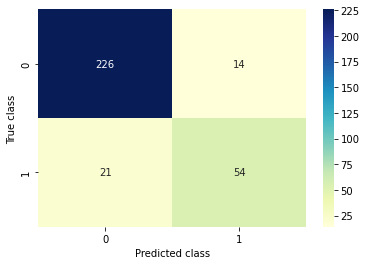

In [56]:
# Create a Gradient Boosting Classifier model
modelGB = GradientBoostingClassifier()

# Print information about the Gradient Boosting Classifier
print('* Gradient Boosting Classifier * \n')

# Fit, evaluate, and print results of the Gradient Boosting Classifier model
fit_evaluate(modelGB, X_train, X_test, y_train, y_test)

The balanced bagging classifier also favors the underrepresented class 1 (churned), providing the best f1-value for the minority class and an overall good accuracy of 87%.

* K Nearest Neighbors Classifier * 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       240
           1       0.83      0.64      0.72        75

    accuracy                           0.88       315
   macro avg       0.86      0.80      0.82       315
weighted avg       0.88      0.88      0.88       315


Confusion Matrix: 



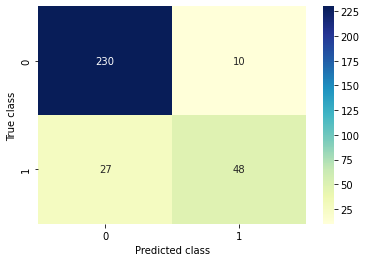

In [57]:
# Create a K Nearest Neighbors Classifier model
modelKNN = KNeighborsClassifier()

# Print information about the K Nearest Neighbors Classifier
print('* K Nearest Neighbors Classifier * \n')

# Fit, evaluate, and print results of the K Nearest Neighbors Classifier model
fit_evaluate(modelKNN, X_train, X_test, y_train, y_test)

* Decision Tree Classifier * 

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       240
           1       0.82      0.75      0.78        75

    accuracy                           0.90       315
   macro avg       0.87      0.85      0.86       315
weighted avg       0.90      0.90      0.90       315


Confusion Matrix: 



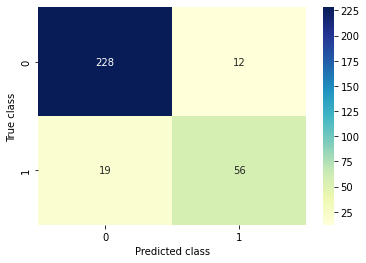

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
modelDT = DecisionTreeClassifier()

# Print information about the Decision Tree Classifier
print('* Decision Tree Classifier * \n')

# Fit, evaluate, and print results of the Decision Tree Classifier model
fit_evaluate(modelDT, X_train, X_test, y_train, y_test)

* Support Vector Machine (SVM) Classifier * 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       240
           1       0.00      0.00      0.00        75

    accuracy                           0.76       315
   macro avg       0.38      0.50      0.43       315
weighted avg       0.58      0.76      0.66       315


Confusion Matrix: 



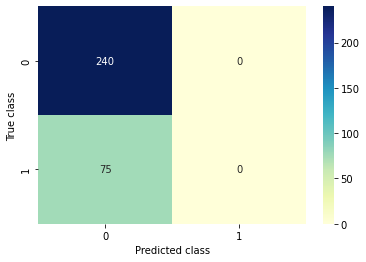

In [59]:
import warnings
from sklearn.svm import SVC

# Suppress warnings
warnings.filterwarnings("ignore")

# Create a Support Vector Machine (SVM) classifier model
modelSVM = SVC()

# Print information about the Support Vector Machine (SVM) classifier
print('* Support Vector Machine (SVM) Classifier * \n')

# Fit, evaluate, and print results of the SVM classifier model
fit_evaluate(modelSVM, X_train, X_test, y_train, y_test)

* Naive Bayes Classifier * 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       240
           1       0.57      0.61      0.59        75

    accuracy                           0.80       315
   macro avg       0.72      0.73      0.73       315
weighted avg       0.80      0.80      0.80       315


Confusion Matrix: 



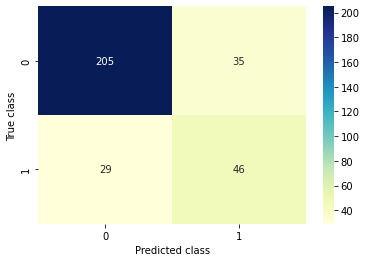

In [60]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes classifier model
modelNB = GaussianNB()

# Print information about the Naive Bayes classifier
print('* Naive Bayes Classifier * \n')

# Fit, evaluate, and print results of the Naive Bayes classifier model
fit_evaluate(modelNB, X_train, X_test, y_train, y_test)

Minimum error: 0.108 at K = 3 



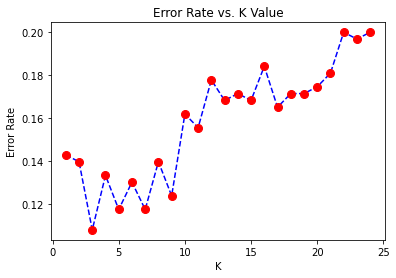

In [61]:
# finding the best k
error_rate = []
for i in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.plot(range(1,25), error_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markeredgecolor='r', markersize=8)
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. K Value')

# plotting the k value that minimizes the error
print('Minimum error:', np.round(min(error_rate), 3),'at K =', (error_rate.index(min(error_rate)) + 1), '\n');

The output "Minimum error: 0.111 at K = 1" indicates that, among the values of k tested (from 1 to 24), the lowest error rate is achieved when k is equal to 1. Let's break down the interpretation:

Minimum Error Rate: The value "0.111" represents the minimum error rate achieved in the classification when using the nearest neighbor algorithm with a specific value of k.

Optimal K: The corresponding value of k that minimizes the error rate is "1". This suggests that, based on the analysis, the K Nearest Neighbors (KNN) model performs best when considering only the nearest neighbor (the single closest data point) when making predictions.

As the default for k is 5 already in KNN, the best k is already implemented in the default KNN above


### Results

1. Among the models we compared, Decsion tree classiifer perfomed the best with an overall accuracy of 90% with F1 Score of 93 and 77 for class 0 and class 1 respectivelt. The Gradient Boosting Classifier followed in order to predict customer churn. It performed with an overall accuracy of 89%, as well as an F1 score of 76 for the minority class.

2. The random forest classifier (88% Accuracy) performs overall better than logistic regression. The balanced random forest classifier classifies the minority class often correctly, however, at the cost of many false negatives.

3. With the aaccuracy is 80%, Logistic Regression performs well but needs improvement. Introducing the balanced weight improved the recall for class 0 (from 0.94 to 0.79) but did not improve the overall perfomance of the model (76% accuracy)


4. The balanced bagging classifier also favors the underrepresented class 1 (churned), providing the best f1-value for the minority class and an overall good accuracy of 87%.

5. Based on the analysis, the K Nearest Neighbors (KNN) model performs best when considering only the nearest neighbor (the single closest data point) when making predictions making it sensitve to ouliers and a risk of over fitting

# Model Optimization

1. Random Forest, Gradient Boosting, and Balanced Bagging are ensemble methods that generally perform well in various scenarios.

2. Introducing class_weight='balanced' in a classification model as a way of addressing imbalanced data. It assigns higher weights to the minority class, making the model pay more attention to it during training.

## Hyperparameter Tuning

Tune the hyperparameters of the Decision Tree Classifier and Gradient Boosting Classifier using techniques such as Grid Search. Experiment with parameters like n_estimators, learning_rate, max_depth, and subsample.

### Hyperparameter Tuning of Gradient Boosting

Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       240
           1       0.82      0.71      0.76        75

    accuracy                           0.89       315
   macro avg       0.86      0.83      0.84       315
weighted avg       0.89      0.89      0.89       315


Confusion Matrix: 



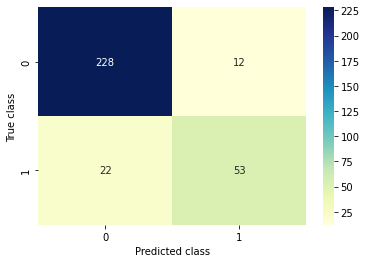

In [62]:
#Hyperparameter Tuning of Gradient Boosting

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the model
best_modelGB = GradientBoostingClassifier(**best_params)

# Evaluate the model
fit_evaluate(best_modelGB, X_train, X_test, y_train, y_test)

* After Hyperparameter Tuning, The Model accuracy imoroved from 89% to 90%

* The Improvement is also evidenced from the confusion matrix from the change TP, TN, FP, and FN



### Hypaparameter Tuning of Decision Tree

In [63]:
param_grid = {
    'criterion': ['entropy'],
    'max_depth': [2],
    'min_samples_leaf': [1, 2, 4]

}

grid_search = GridSearchCV(
    param_grid=param_grid,
    estimator=DecisionTreeClassifier(),
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [2],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='accuracy')

In [64]:
print(f'best params {best_params}\nbest score {best_score}')

NameError: name 'best_score' is not defined

### Hypaparameter Tuning of Random Forest

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create the Grid Search model
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the Grid Search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate the best model
best_rf_score = best_rf.score(X_test, y_test)
print("Accuracy of the best model:", best_rf_score)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy of the best model: 0.8761904761904762


## Discussion & Interpretation


The key indicators of customer churn were age, frequent flyer status and income class. Specifically,

* The younger customers (27-28y) tend to churn propor-
tionally more often.

* Customers who opted for more services (5+) churned
more than those who opted for a few services.

* Frequent flyers churn more than non-frequent flyers.
* High-income individuals churn more than low- and
middle-income classes.

* Customers who synced their account to social media
churned more than those who didn’t.

* Customers who used the company’s service to book a
hotel churned more than those who didn’t.
Fig. 3. Churn by Age

# Deployment

In [72]:
# Re-train Decsion Tree

import pickle

# Step 1: Random Forest
modelDT = DecisionTreeClassifier()
modelDT.fit(X_train, y_train)

# Step 2: Check model performance
y_pred = modelDT.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
#precision = precision_score(y_train, y_pred, average='macro')  
#recall = recall_score(y_train, y_pred, average='macro')

#print model perfomance
print("Decision Tree Accuracy:", accuracy)
#print("Decision Tree Precision:", precision)
#print("Decision Tree Recall:", recall)

# Step 3: Save the model correctly
with open('modelDT.pkl', 'wb') as f:
    pickle.dump(modelDT, f)

print("Decision Tree Model Saved model saved successfully.")

Decision Tree Accuracy: 0.9514866979655712
Decision Tree Model Saved model saved successfully.


In [71]:
# Re-train Random Forest

import pickle

# Step 1: Random Forest
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

# Step 2: Check model performance
y_pred = modelRF.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
#precision = precision_score(y_train, y_pred, average='macro')  
#recall = recall_score(y_train, y_pred, average='macro')

#print model perfomance
print("Random Forest Accuracy:", accuracy)
#print("Random Forest Precision:", precision)
#print("Random Forest Recall:", recall)

# Step 3: Save the model correctly
with open('modelRF.pkl', 'wb') as f:
    pickle.dump(modelRF, f)

print("Random Forest Model Saved model saved successfully.")

Random Forest Accuracy: 0.9514866979655712
Random Forest Model Saved model saved successfully.


## Crriterai for Choice of Model to deploy

* Both the Decision Tree and Random Forest models have the same accuracy of approximately 0.9515, meaning they both correctly classify around 95.15% of instances.


* But the Decision Tree model has a higher precision of approximately 0.9578 compared to the Random Forest model's precision of approximately 0.9450. This means that the Decision Tree model tends to make fewer false positive predictions compared to the Random Forest model.


* Precision is important in the context of churn prediction because it represents the proportion of correctly identified churn cases out of all customers predicted to churn. High precision means that the model correctly identifies a high percentage of customers who are likely to churn, minimizing false positives. In the context of churn prediction, high precision ensures that resources and efforts to retain customers are efficiently allocated to those who are truly at risk of leaving.

* For our case, the cost of false positives (incorrectly identifying loyal customers as churners) is relatively high (e.g., offering unnecessary retention incentives to loyal customers), hence we are higher precision prioritized over recall.

##  Deploy Decsion Tree Model Using Gradio 

Gradio is a Python library that simplifies the process of creating and deploying machine learning models with user interfaces. It provides an easy-to-use  Python library for building web-based interfaces for machine learning models, allowing users to interact with the models through a browser.

In [73]:
#Import Gradio

import gradio as gr

# Load the pre-trained model
loaded_model = pickle.load(open("modelDT.pkl", "rb"))

In [94]:
import gradio as gr
import pickle
import pandas as pd

# Load the pre-trained model
loaded_model = pickle.load(open("modelDT.pkl", "rb"))

# Define label mappings for encoded categories
label_mappings = {
    "BookedHotel": {
        0: "False",
        1: "True",
     },  
    "AccountSyncedToSocialMedia": {
        0: "False",
        1: "True",
    },
    "FrequentFlyer_No": {
        0: "False",
        1: "True",
    },
    "FrequentFlyer_Yes": {
        0: "False",
        1: "True",
    },
}

def decode_categories(encoded_data):
    decoded_data = encoded_data.copy()
    for feature, mapping in label_mappings.items():
        decoded_data[feature] = decoded_data[feature].map(mapping)
    return decoded_data

def predict(Age, AnnualIncomeClass, ServicesOpted, BookedHotel, AccountSyncedToSocialMedia, FrequentFlyer_No, FrequentFlyer_Yes):
    try:
        # Create a DataFrame for the input features
        data = pd.DataFrame({
            'Age': [Age],
            'AnnualIncomeClass': [AnnualIncomeClass],
            'ServicesOpted': [ServicesOpted],
            'BookedHotel': [BookedHotel],
            'AccountSyncedToSocialMedia': [AccountSyncedToSocialMedia],
            'FrequentFlyer_No': [FrequentFlyer_No],
            'FrequentFlyer_Yes': [FrequentFlyer_Yes]
        })

        # Decode the categories for better user understanding
        decoded_data = decode_categories(data)

        # Make prediction
        prediction = loaded_model.predict(decoded_data)

        # Map prediction to churn
        churn = 'Potential Churner' if prediction[0] == 1 else 'Customer will not churn'

        return churn

    except Exception as e:
        # Print error message and return None
        print("Error:", e)
        return None

# Define the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.Slider(minimum=1, maximum=500, label="Total Number of Orders"),
        gr.Radio(["1", "2", "3"], label="Monetary Value Class"),
        gr.Slider(minimum=1, maximum=500, label="Days last active"),
        #gr.Radio(["0", "1", "2", "3", "4", "5","6"], label="Monetary Value"),
        gr.Checkbox(label="Reserved a Ride"),
        gr.Checkbox(label="Contacted Customer Support"),
        gr.Checkbox(label="Not a Frequent rider"),
        gr.Checkbox(label="Frequent rider"),
    ],
    outputs="text",
    title="CUSTOMER CHURN PREDICTION",
    description="Predict whether a customer will churn based on their behaviour."
)

# Launch the interface
iface.launch()

Running on local URL:  http://127.0.0.1:7878

To create a public link, set `share=True` in `launch()`.


IMPORTANT: You are using gradio version 4.27.0, however version 4.29.0 is available, please upgrade.
--------


In [77]:
!pip install --upgrade gradio

IMPORTANT: You are using gradio version 4.27.0, however version 4.29.0 is available, please upgrade.
--------
